In [31]:
import os
import numpy as np
import pandas as pd
import scipy.stats
from tqdm.notebook import tqdm
from glob import glob
from matplotlib import pyplot as plt

import Regressions as reg
import DataBuild as db

In [75]:
def abbrv(beta):
    if beta == 'session': return 'SESS'
    if beta == 'lag': return 'LAG'
    if beta == 'sem': return 'SIM'
    if beta == 'total_recalls': return 'R'
    if beta == 'lag_sem': return 'SIMxLAG'
    if beta == 'output_pos': return 'OP'
    if beta == 'irt-1': return 'IRT₋₁'
    if beta == 'irt-2': return 'IRT₋₂'
    return beta

In [68]:
sd = 3

In [69]:
# get behavioral data for ltpFR2 all subjects
path = '/data/eeg/scalp/ltp/ltpFR2/behavioral/data/'
files = [f for f in glob(path+'beh_data_LTP*.json') if 'incomplete' not in f]
subjs = ['LTP'+file.split('LTP')[1].replace('.json', '') for file in files]

In [96]:
def get_betas(subjs, **kwargs):
    """Returns all betas and pvals for the subjects given. """
    
    r2s = []
    betas = pd.DataFrame()
    pvals = pd.DataFrame()

    for subject in tqdm(subjs):
        model = reg.get_model(subject=subject, **kwargs)
        betas[subject] = model.params
        pvals[subject] = model.pvalues
        r2s.append(model.rsquared)
    betas = betas.transpose()
    pvals = pvals.transpose()
    return betas, pvals

In [103]:
def relabel_betas(betas, pvals):
    order = ['output_pos', 'total_recalls', 'lag',
             'sem', 'session', 'lag_sem', 'irt-1', 'irt-2']
    betas = betas.copy()
    pvals = pvals.copy()
    for i in [betas, pvals]:
        i.pop('const')
        for key in order:
            i[abbrv(key)] = i.pop(key)
    return betas, pvals

In [104]:
rbetas, rpvals = get_betas(subjs)

In [105]:
betas, pvals = relabel_betas(rbetas, rpvals)

In [107]:
results = pd.DataFrame()
results['mean'] = betas.mean().round(sd)
results['CI'] = (1.96 * betas.sem()).round(sd)
r2 = pd.Series([np.mean(r2s), scipy.stats.sem(r2s)], name='R^2', index=['mean', 'CI']).round(sd)
results = results.append(r2)

results

,mean,CI
OP,0.148,0.016
R,-0.090,0.015
LAG,0.400,0.020
SIM,-0.138,0.012
SESS,-0.094,0.014
SIMxLAG,-0.095,0.010
IRT₋₁,0.085,0.013
IRT₋₂,0.076,0.008
R^2,0.255,0.006


Text(0, 0.5, 'Z(Beta Coeficient)')

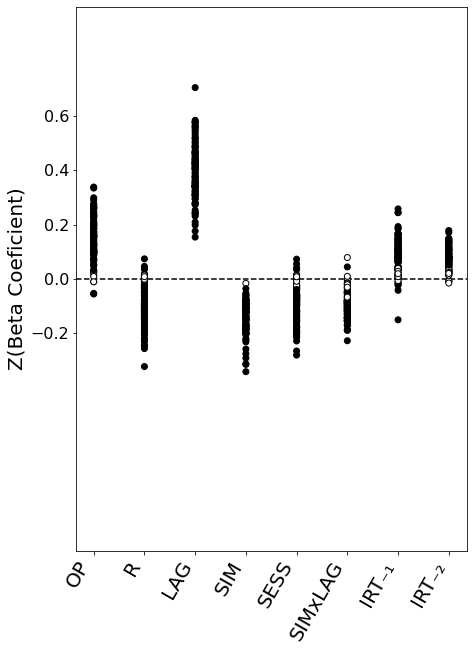

In [120]:
fig, axes = plt.subplots(figsize=(7,10))

plt.axhline(0, color='k', linestyle='--', zorder=1)

for i, col in enumerate(betas.columns):
    colors = [(0,0,0) if p < 0.05
              else (1,1,1)
              for p in pvals[col]]
    plt.scatter([i]*len(betas), betas[col], c=colors, edgecolor='k', zorder=10)
plt.xticks(range(len(order)), [abbrv(i) for i in order], rotation=60, ha='right', fontsize=20)
plt.yticks(np.arange(-.2,.7, .2), fontsize=16)
plt.ylim((-1, 1))
plt.ylabel('Z(Beta Coeficient)', fontsize=20)

In [93]:
plt.xlabel?

Signature: plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
Docstring:
Set the label for the x-axis.

Parameters
----------
xlabel : str
    The label text.

labelpad : float, default: None
    Spacing in points from the axes bounding box including ticks
    and tick labels.

loc : {'left', 'center', 'right'}, default: :rc:`xaxis.labellocation`
    The label position. This is a high-level alternative for passing
    parameters *x* and *horizontalalignment*.

Other Parameters
----------------
**kwargs : `.Text` properties
    `.Text` properties control the appearance of the label.

See Also
--------
text : Documents the properties supported by `.Text`.
File:      ~/anaconda2/envs/py3_env/lib/python3.6/site-packages/matplotlib/pyplot.py
Type:      function
